In [ ]:
!pip install tensorflow

In [7]:
import tensorflow as tf
from tensorflow import keras


In [8]:
import matplotlib.pyplot as plt

keras provide with some function 

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

* since using Neural Network using the gradent descent need to scale the dataset
* NOTICE : NOT SCALING y

In [11]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

(-0.5, 27.5, 27.5, -0.5)

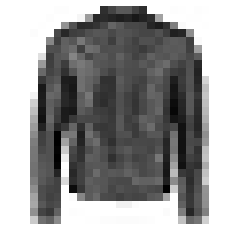

In [12]:
#show the image
plt.imshow(X_train[985], cmap = "binary")
plt.axis('off')

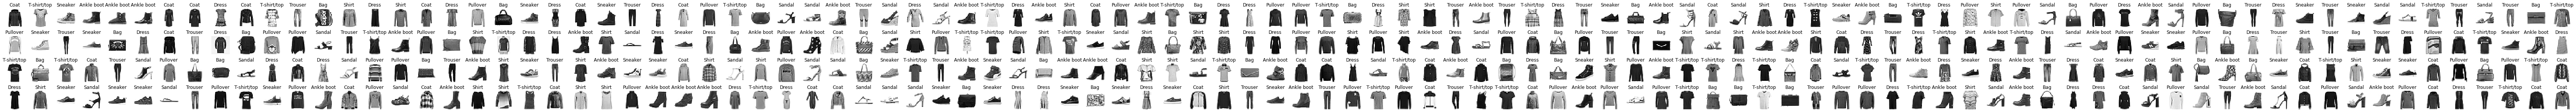

In [8]:
#let's look at the sample of images
n_rows = 4
n_cols = 100
plt.figure(figsize = (n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap = "binary", interpolation = "nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize = 12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

* y_train consists of a number [] (an array of numbers)
* which correspond to certain kind of clothing 
y_train[8] == 3
class_name[3] = dress

In [6]:
class_names[y_train[10]]

'T-shirt/top'

In [14]:
#creating model using the sequential api
# CLASSIFICATION MLP-2 HIDDEN LAYER
model = keras.models.Sequential()

creates a `Sequential` model 
- Single stack of layers, connected sequentially

In [8]:
model.add(keras.layers.InputLayer(input_shape=[28,28]))

`inputLayer` sets the first layer setting sahpe o instances as [28,28]. Doesn't have any parameters. receives input data

In [9]:
model.add(keras.layers.Dense(300, activation = "relu"))

create a `dense hidden layer` with `300` neurons using `ReLU` activaation function
- each `Dense` layer  anages its own weight matrix : containing weights between neurons and inputs.
This layer computes $\phi(XW + b)$

In [10]:
model.add(keras.layers.Dense(100, activation = "relu"))

another hidden layer of 100 neurons

model.add(keras.layers.Dense(10, activation = "softmax"))

In [15]:
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

final another dense layer with 10 neurons (one per class)  using  thesoftmax activation function (because the classes are exclusive). (?)

In [38]:
keras.utils.plot_model(model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


the number of params = 235500 because 784* neurons = 300 + bias = neuron(connection weights)
* model runs the RISK OVERFITTING - if not lot of data


In [12]:
# fetching thr models list of layer  by index or by name
model.layers

In [13]:
#name of the layer
hidden1 = model.layers[1]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
#to access the weights and bias
weights, bias = hidden1.get_weights()

In [16]:
weights

array([[ 0.06521191, -0.04780792, -0.07037531, ...,  0.07179321,
        -0.05017886,  0.01418386],
       [-0.03029696,  0.06316188, -0.07428954, ..., -0.02433101,
        -0.06833916,  0.01148283],
       [ 0.03375992,  0.06365629, -0.03247521, ..., -0.01173583,
        -0.05493081,  0.01516927],
       ...,
       [-0.03968355,  0.05985877,  0.05190288, ...,  0.01553806,
        -0.06321526, -0.05619911],
       [ 0.00214031, -0.04546396, -0.00640272, ...,  0.05215083,
         0.0313449 , -0.00347219],
       [-0.0165008 ,  0.00665127, -0.01090126, ...,  0.06900674,
         0.00856109,  0.06023169]], dtype=float32)

In [17]:
weights.shape

(784, 300)

The shape of the weight matrix depends on number of inputs us. It shows the ranomized weights breaking the symmetry and != 0

In [18]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
bias.shape

(300,)

### compiling the model

In [11]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs = 30, 
                   validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7160 - accuracy: 0.7658 - val_loss: 0.5090 - val_accuracy: 0.8296
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4866 - accuracy: 0.8310 - val_loss: 0.4468 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4442 - accuracy: 0.8440 - val_loss: 0.4139 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4148 - accuracy: 0.8535 - val_loss: 0.3907 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3946 - accuracy: 0.8605 - val_loss: 0.3828 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3788 - accuracy: 0.8664 - val_loss: 0.3675 - val_accuracy: 0.8742
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3653 - accuracy: 0.8708 - val_loss: 0.3624 - val_accuracy:

- if data SKEWED use `class_weight` in `fit()`
- if data is labeled using expert and crowd want to give more weight to earer - set `sample_weight()`

In [13]:
#evaluting on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 73.9683 - accuracy: 0.8328


[73.9682846069336, 0.8327999711036682]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 78ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
import numpy as np

In [17]:
y_pred = np.argmax(model.predict(X_new),axis = -1)
y_pred

1/1 [==============================] - 0s 42ms/step


array([9, 2, 1])

In [18]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [19]:
y_new = y_test[:3]
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Regression Model using API

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
housing = fetch_california_housing()

In [18]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [19]:
model_reg = keras.models.Sequential([keras.layers.Dense(30, activation  = "relu", input_shape=X_train.shape[1:]), 
keras.layers.Dense(1)])

In [21]:
model_reg.compile(loss = "mean_squared_error", optimizer="sgd")

In [22]:
history = model_reg.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7584 - val_loss: 5.5335
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4877 - val_loss: 11.2254
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4827 - val_loss: 0.3793
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4077 - val_loss: 0.3727
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3980 - val_loss: 0.3643
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3906 - val_loss: 0.3617
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3860 - val_loss: 0.3567
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3787 - val_loss: 0.3523
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3773 - val_loss: 0.3476
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3701 - val_loss: 0.345

In [23]:
history = model_reg.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
mse_test = model_reg.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3492 - val_loss: 0.3609
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3598 - val_loss: 0.3582
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3514 - val_loss: 0.4015
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3480 - val_loss: 0.3781
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3461 - val_loss: 0.3625
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3442 - val_loss: 0.3662
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3508 - val_loss: 0.3747
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3431 - val_loss: 0.3619
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3427 - val_loss: 0.3718
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3416 - val_loss: 0.3736

ValueError: in user code:

    File "/home/rhythm/anaconda3/envs/widgets-tutorial/lib/python3.8/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/home/rhythm/anaconda3/envs/widgets-tutorial/lib/python3.8/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/rhythm/anaconda3/envs/widgets-tutorial/lib/python3.8/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/home/rhythm/anaconda3/envs/widgets-tutorial/lib/python3.8/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/home/rhythm/anaconda3/envs/widgets-tutorial/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/rhythm/anaconda3/envs/widgets-tutorial/lib/python3.8/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(None, 8)


## Sequential Complex Functional API

In [28]:
X_train.shape

(11610, 8)

In [24]:
input = keras.layers.Input(shape = X_train.shape[1:])

Creating input object
shape of column == number of features

In [29]:
hidden1 =  keras.layers.Dense(30, activation = "relu")(input)

creating a dense layer of 30 neurons with activation functin of relu. we call it like function, passing it as function. Telling keras how to connect the layer 


In [30]:
hidden2  = keras.layers.Dense(30, activation = "relu")(hidden1)

In [32]:
concat = keras.layers.Concatenate()([input, hidden2])